In [12]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [15]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

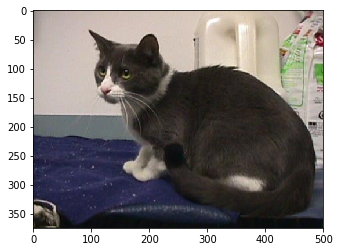

In [16]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

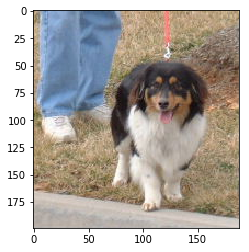

In [18]:
dog2 = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)
plt.imshow(dog2)

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range = 0.10,
                              height_shift_range = 0.1,
                              rescale = 1/255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True,
                              fill_mode='nearest'
                              )

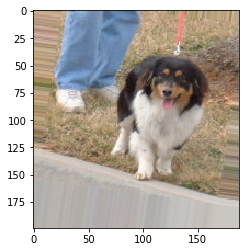

In [34]:
plt.imshow(image_gen.random_transform(dog2))

In [35]:
image_gen.flow_from_directory('CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


In [41]:
input_shape=(150,150,3)

In [42]:
from keras.models import Sequential

In [56]:
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [63]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
flatten_11 (Flatten)         (None, 700928)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               89718912  
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total para

In [66]:
batch_size = 16